In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
titanic_data = pd.read_csv(r"C:\Users\magda\OneDrive\Pulpit\studia\python\projekt_analiza_pasażerów_titanica\titanic\train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:ylabel='Frequency'>

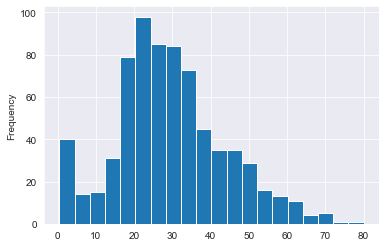

In [71]:
#histogram wieku wszystkich pasażerów
sns.set_style('darkgrid')
titanic_data['Age'].plot(kind='hist', bins=20)

In [72]:
#aby dane były bardziej czytelnie zmieniam 0 no "no" i 1 na "yes"
titanic_data.loc[:,'Survived'][titanic_data['Survived']==0]='no'
titanic_data.loc[:,'Survived'][titanic_data['Survived']==1]='yes'

C:\Users\magda\AppData\Local\Temp\ipykernel_4692\3709686332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data.loc[:,'Survived'][titanic_data['Survived']==0]='no'


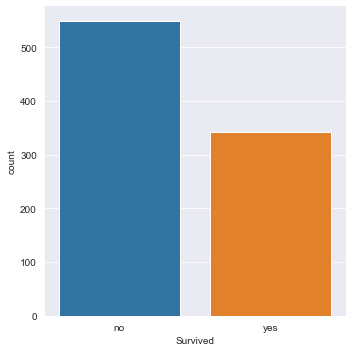

Survived: 342
Not survived: 549


In [45]:
#Analiza danych - co mogło mieć wpływ na przeżycie pasażerów 
#Najpierw sprawdzam ile osób przeżyło a ile nie
sns.catplot(x="Survived", 
            data=titanic_data, 
            aspect=1.0, 
            kind='count')
plt.show()

print(f"Survived: {sum(titanic_data['Survived']=='yes')}")
print(f"Not survived: {sum(titanic_data['Survived']=='no')}")

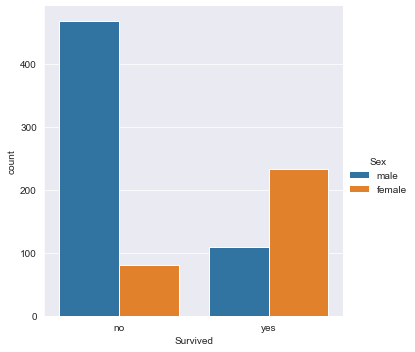

Survived  Sex   
no        male      468
          female     81
yes       female    233
          male      109
Name: Sex, dtype: int64


In [46]:
#Następnie sprawdzam czy płeć miała wpływ na przeżycie 
sns.catplot(data=titanic_data,
           x='Survived',
           kind = 'count',
           hue= 'Sex')
plt.show()
print( titanic_data.groupby('Survived')['Sex'].value_counts() )
#z wykresu można wywnioskować, że zdecydowanie spośród ocalałych dominują kobiety a sposród osób, które nie ocalały - mężczyźni

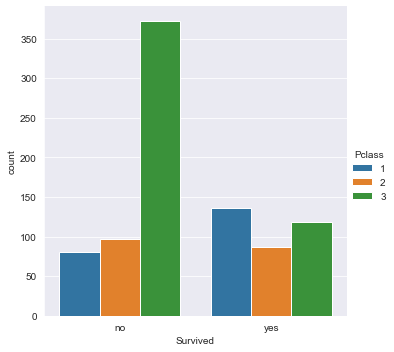

Survived  Pclass
no        3         372
          2          97
          1          80
yes       1         136
          3         119
          2          87
Name: Pclass, dtype: int64


In [50]:
#Następnie sprawdzam czy klasa biletu miała wpływ na przeżycie 
sns.catplot(data=titanic_data,
           x='Survived',
           kind = 'count',
           hue= 'Pclass')
plt.show()
print( titanic_data.groupby('Survived')['Pclass'].value_counts() )
#z wykresu można wywnioskować, że najmniej ocalałych posiadało klasę biletu numer 3

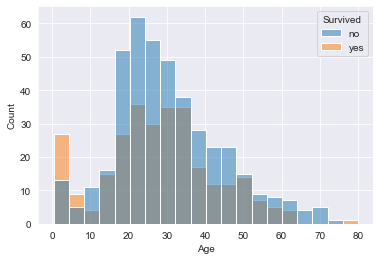

Survived  Age 
no        21.0    19
          28.0    18
          18.0    17
          25.0    17
          19.0    16
                  ..
yes       43.0     1
          47.0     1
          53.0     1
          55.0     1
          80.0     1
Name: Age, Length: 142, dtype: int64


In [48]:
#Sprawdzam jak kształyuje się wykres ocalałych ze względu na wiek
sns.histplot(titanic_data,
             x='Age',
             hue='Survived', 
             #multiple="stack", 
            )
plt.show()
print( titanic_data.groupby('Survived')['Age'].value_counts() )
#Z wykresu można wywnioskować,że jedyną grupą wiekową, w której jest więcej ocelałych to grupa dzieci poniżej 10 roku życia

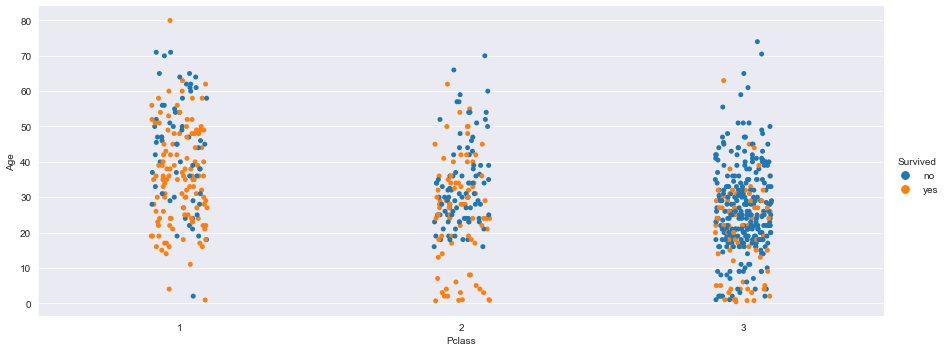

In [66]:
#Sprawdzam jeszcze zależność przeżycia od klasy biletu i wieku
sns.catplot(x='Pclass', 
            y='Age', 
            data=titanic_data, 
            aspect=2.5,
            hue='Survived')
plt.show()
# Z wykresu wynika, że zdecydowanie najwięcej osób przeżyło w klasie 1 (niezależnie od wieku) a najmniej w klasie 3.

In [67]:
#Podumowując na statku najprawdopodbniej była stosowana zasada "Najpierw kobiety i dzieci". 
#Klasa biletu również miała znaczenie - im wyższa tym większe szanse na przeżycie. 